## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
print(x_train.shape)
print(x_test.shape)

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 10)
(10000, 10)


In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
  
model = build_mlp()
model.summary()

W0802 07:51:54.658377 140279261722496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 07:51:54.700331 140279261722496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 07:51:54.708493 140279261722496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0802 07:51:54.813633 140279261722496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 07:51:54.828079 140279261722496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_test, y_test), shuffle=True)

W0802 07:51:54.987761 140279261722496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0802 07:51:55.061774 140279261722496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.9384 - acc: 0.2989 - val_loss: 1.7505 - val_acc: 0.3663
Epoch 2/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6985 - acc: 0.3920 - val_loss: 1.6639 - val_acc: 0.4077
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6211 - acc: 0.4207 - val_loss: 1.6722 - val_acc: 0.4006
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5526 - acc: 0.4461 - val_loss: 1.5876 - val_acc: 0.4387
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5048 - acc: 0.4642 - val_loss: 1.6100 - val_acc: 0.4193
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4710 - acc: 0.4770 - val_loss: 1.4924 - val_acc: 0.4652
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4266 - acc: 0.4914 - val_loss: 1.4456 - val_ac

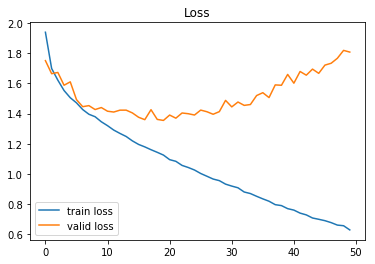

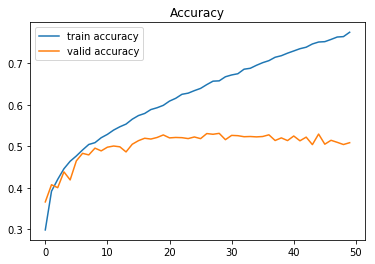

In [11]:
# 以視覺畫方式檢視訓練過程
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.figure(1)
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend(); plt.title("Loss");

plt.figure(2)
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend(); plt.title("Accuracy");

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢